# Performance Skyline
The perfomance skyline of a trace contains only the events in the dominant path.

Demo for: 
* vis.plot_traces
* vis.plot_activities
* vis.plot_duration_traces
* vis.run_plots

More info in [Performance Skyline: Inferring Process Performance Models from Interval Events Paper](https://www.springerprofessional.de/en/performance-skyline-inferring-process-performance-models-from-in/19021296)

In [23]:
#%matplotlib widget
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import importlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
print(os.getcwd())
import sys
sys.path.append(os.getcwd()+'/../perfSky')
#sys.path.append('/Users/andreamaldonado/git_tree/perfSky/perfSky')

from Skyline import get_relative_timestamps, get_skyline_points, get_average_trace, get_duration
from Skyline import get_skyline_average, get_average_skyline, get_skyline_activity_set
import Visualizer as pt

In [25]:
ACTIVITY_ID='common_act'

#df = pd.read_csv("../data/daily.2019-July_September.csv")
df = pd.read_csv("../data/clustered_agg_edit_75_daily.csv", sep=";")
#df = df[['case', 'activity', 'start_time', 'end_time','cluster_id']]
#df['start_time']=df['start_time'].apply(lambda x: x.split('+')[0])
#df['end_time']=df['end_time'].apply(lambda x: x.split('+')[0])
df['activity_original'] = df['activity']
df['activity']=df[ACTIVITY_ID]
df.head()

excluding = get_relative_timestamps(df, ['AllTasks']) #'AllTasks' is one entry per log with its overall duration


print('Data set contains:')
print('- ',len(excluding),'events')
print('- ',len(excluding['case'].unique()),'cases')
print('- ',len(excluding['activity'].unique()),'activities')
#print('- ',len(excluding['cluster_id'].unique()),' clustered activities')

excluding.head()

Grouped: 61864 columns ['case', 'activity', 'start_time', 'end_time', 'cluster_id', 'common_act', 'activity_original', 'zero_point']
Merged relatived: 61930 columns ['case', 'activity', 'start_time', 'end_time', 'cluster_id_x', 'common_act_x', 'activity_original_x', 'zero_point', 'cluster_id_y', 'common_act_y', 'activity_original_y']
Data set contains:
-  61930 events
-  50 cases
-  75 activities


,case,activity,rel_start,rel_end,num_start,num_end,start_time,end_time
221,daily.2019-07-01_10-28-01,DumpTask(sql_filename=_11,0:00:00,0:04:52,0.0,292.0,2019-07-01 10:41:26,2019-07-01 10:46:18
222,daily.2019-07-01_10-28-01,DumpTask(sql_filename=reprocess_urls)(kvs=None...,0:00:00,0:01:43,0.0,103.0,2019-07-01 10:41:26,2019-07-01 10:43:09
223,daily.2019-07-01_10-28-01,DumpTask(sql_filename=_11,0:00:00,1:02:58,0.0,3778.0,2019-07-01 10:41:26,2019-07-01 11:44:24
224,daily.2019-07-01_10-28-01,ProxySetupTask_16,0:00:00,0:13:17,0.0,797.0,2019-07-01 10:41:26,2019-07-01 10:54:43
225,daily.2019-07-01_10-28-01,CrawlFeedTask_61,0:00:00,0:17:10,0.0,1030.0,2019-07-01 10:41:26,2019-07-01 10:58:36


In [26]:
sample = excluding[excluding['case'].isin(excluding['case'].unique()[:5])]
excluding = get_relative_timestamps(sample, ['AllTasks']) #'AllTasks' is one entry per log with its overall duration

print('\n\nSample from data set contains:')
print('- ',len(excluding),'events')
print('- ',len(excluding['case'].unique()),'cases')
print('- ',len(excluding['activity'].unique()),'activities')

excluding.head()

Grouped: 6241 columns ['case', 'activity', 'rel_start', 'rel_end', 'num_start', 'num_end', 'start_time', 'end_time', 'zero_point']
Merged relatived: 6265 columns ['case', 'activity', 'rel_start_x', 'rel_end_x', 'num_start_x', 'num_end_x', 'start_time', 'end_time', 'zero_point', 'rel_start_y', 'rel_end_y', 'num_start_y', 'num_end_y']


Sample from data set contains:
-  6265 events
-  5 cases
-  70 activities


,case,activity,rel_start,rel_end,num_start,num_end,start_time,end_time
0,daily.2019-07-01_10-28-01,DumpTask(sql_filename=_11,0:00:00,0:04:52,0.0,292.0,2019-07-01 10:41:26,2019-07-01 10:46:18
21,daily.2019-07-01_10-28-01,CrawlFeedTask_61,0:00:00,0:17:10,0.0,1030.0,2019-07-01 10:41:26,2019-07-01 10:58:36
22,daily.2019-07-01_10-28-01,ProxySetupTask_16,0:00:00,0:13:17,0.0,797.0,2019-07-01 10:41:26,2019-07-01 10:54:43
23,daily.2019-07-01_10-28-01,DumpTask(sql_filename=_11,0:00:00,1:02:58,0.0,3778.0,2019-07-01 10:41:26,2019-07-01 11:44:24
24,daily.2019-07-01_10-28-01,DumpTask(sql_filename=reprocess_urls)(kvs=None...,0:00:00,0:01:43,0.0,103.0,2019-07-01 10:41:26,2019-07-01 10:43:09


In [27]:
vis = pt.Vis()

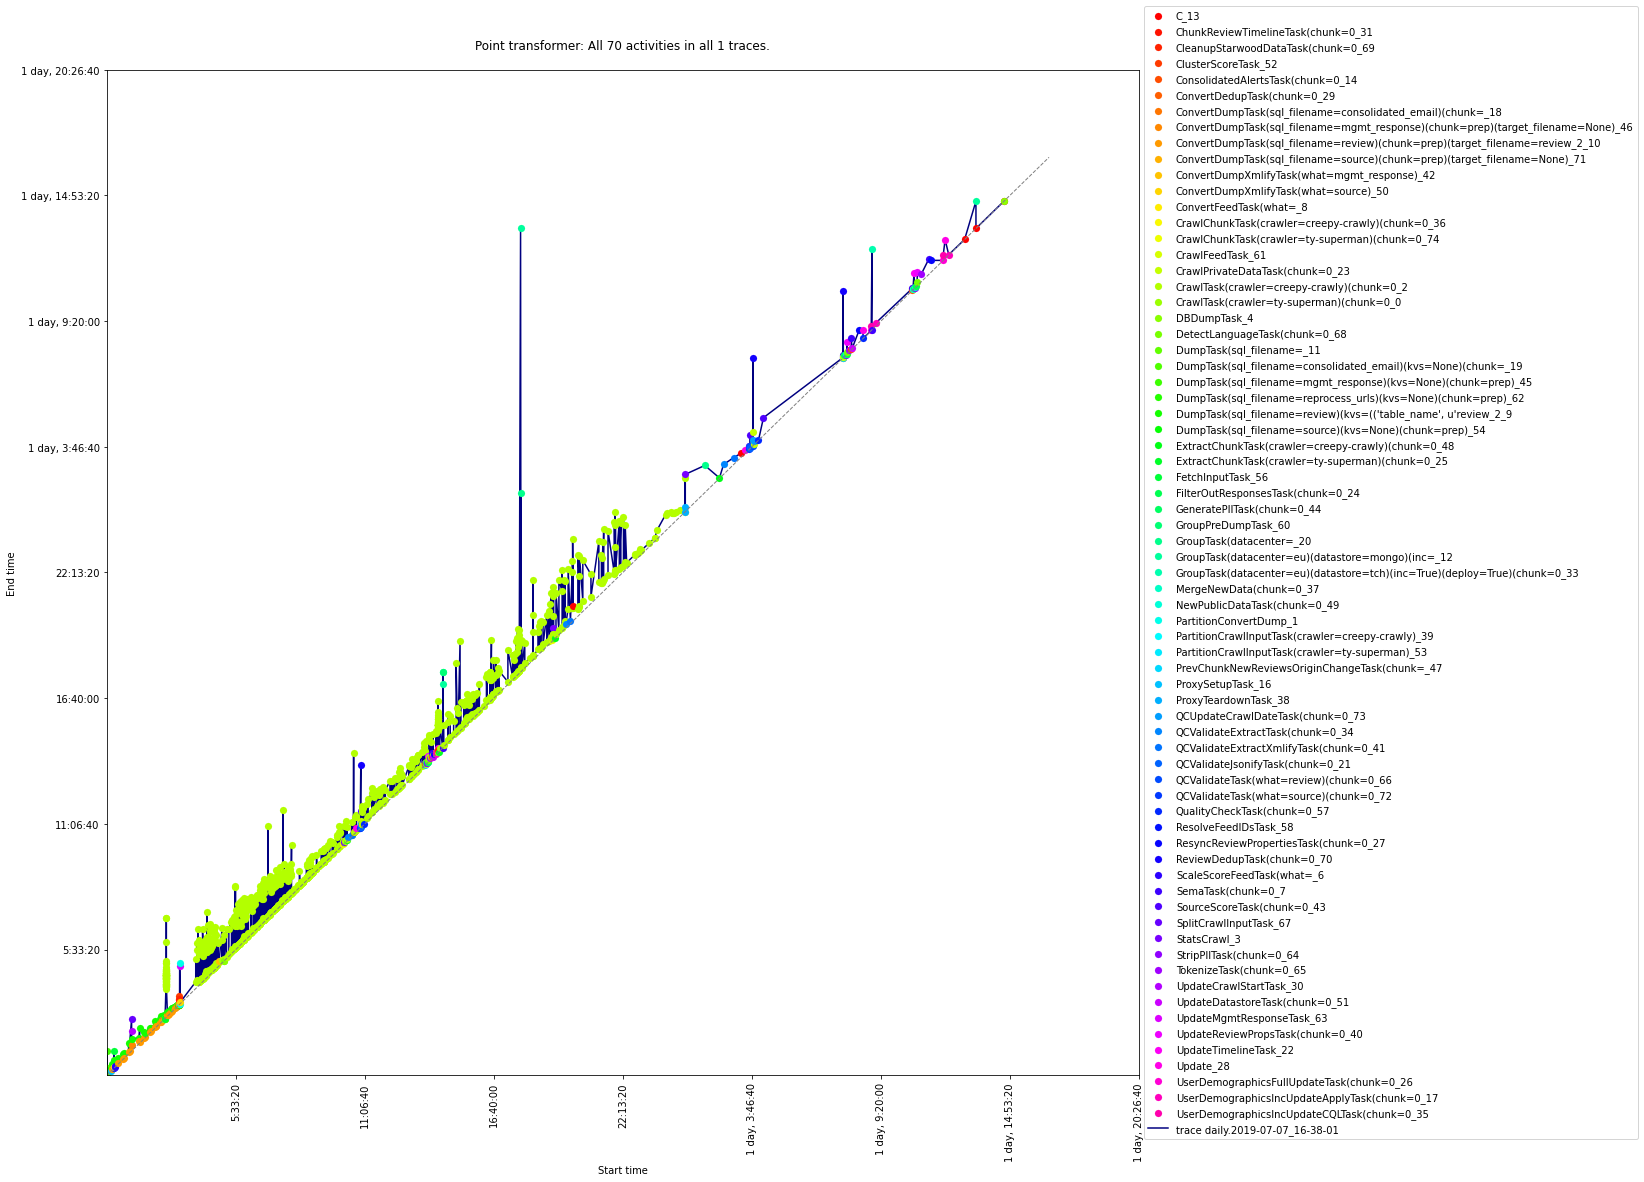

In [37]:
vis.plot_traces(subset[subset['case']==subset['case'].unique()[4]], show_plot=0)

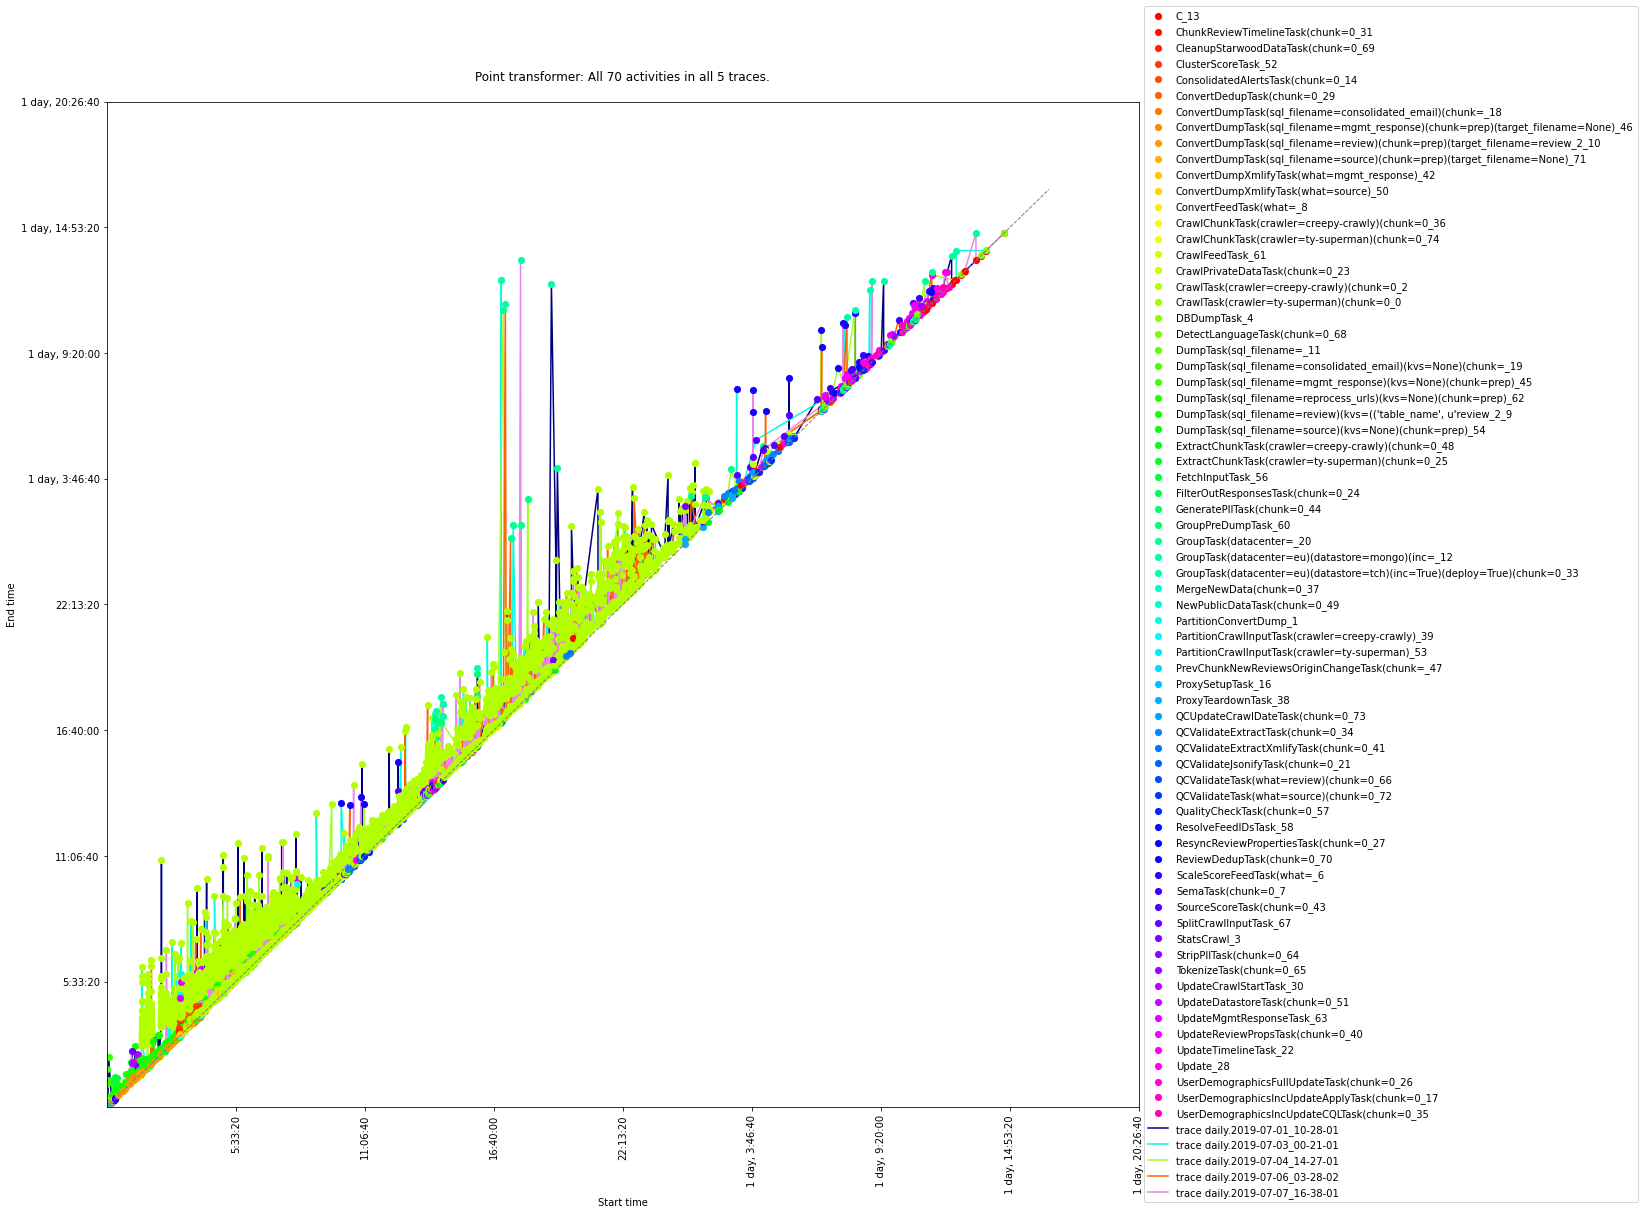

In [28]:
vis.plot_traces(sample, show_plot=None)

<AxesSubplot:ylabel='Frequency'>

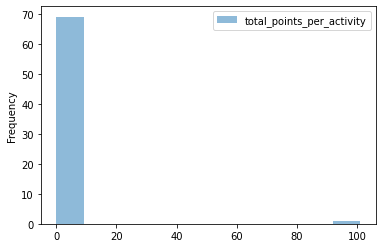

In [29]:
all_by_activity = excluding.groupby('activity').size().reset_index(name='total_points_per_activity').sort_values(by=['total_points_per_activity'], ascending=False)
all_by_activity['total_points_per_activity']=all_by_activity.apply(lambda row: round(row['total_points_per_activity']/50), axis=1)
all_by_activity.plot.hist(bins=11, alpha=0.5)

Frequency of activities having more than 1 event per activity  3 

                                             activity  \
17         CrawlTask(crawler=creepy-crawly)(chunk=0_2   
25  DumpTask(sql_filename=review)(kvs=(('table_nam...   
8   ConvertDumpTask(sql_filename=review)(chunk=pre...   

    total_points_per_activity  
17                        101  
25                          4  
8                           4  


<AxesSubplot:ylabel='Frequency'>

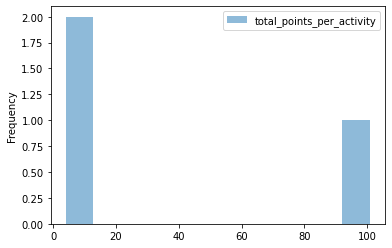

In [30]:
print('Frequency of activities having more than 1 event per activity ',len(all_by_activity[all_by_activity['total_points_per_activity']>1]), '\n')
print(all_by_activity[all_by_activity['total_points_per_activity']>1])
all_by_activity[all_by_activity['total_points_per_activity']>1].plot.hist(bins=11, alpha=0.5)

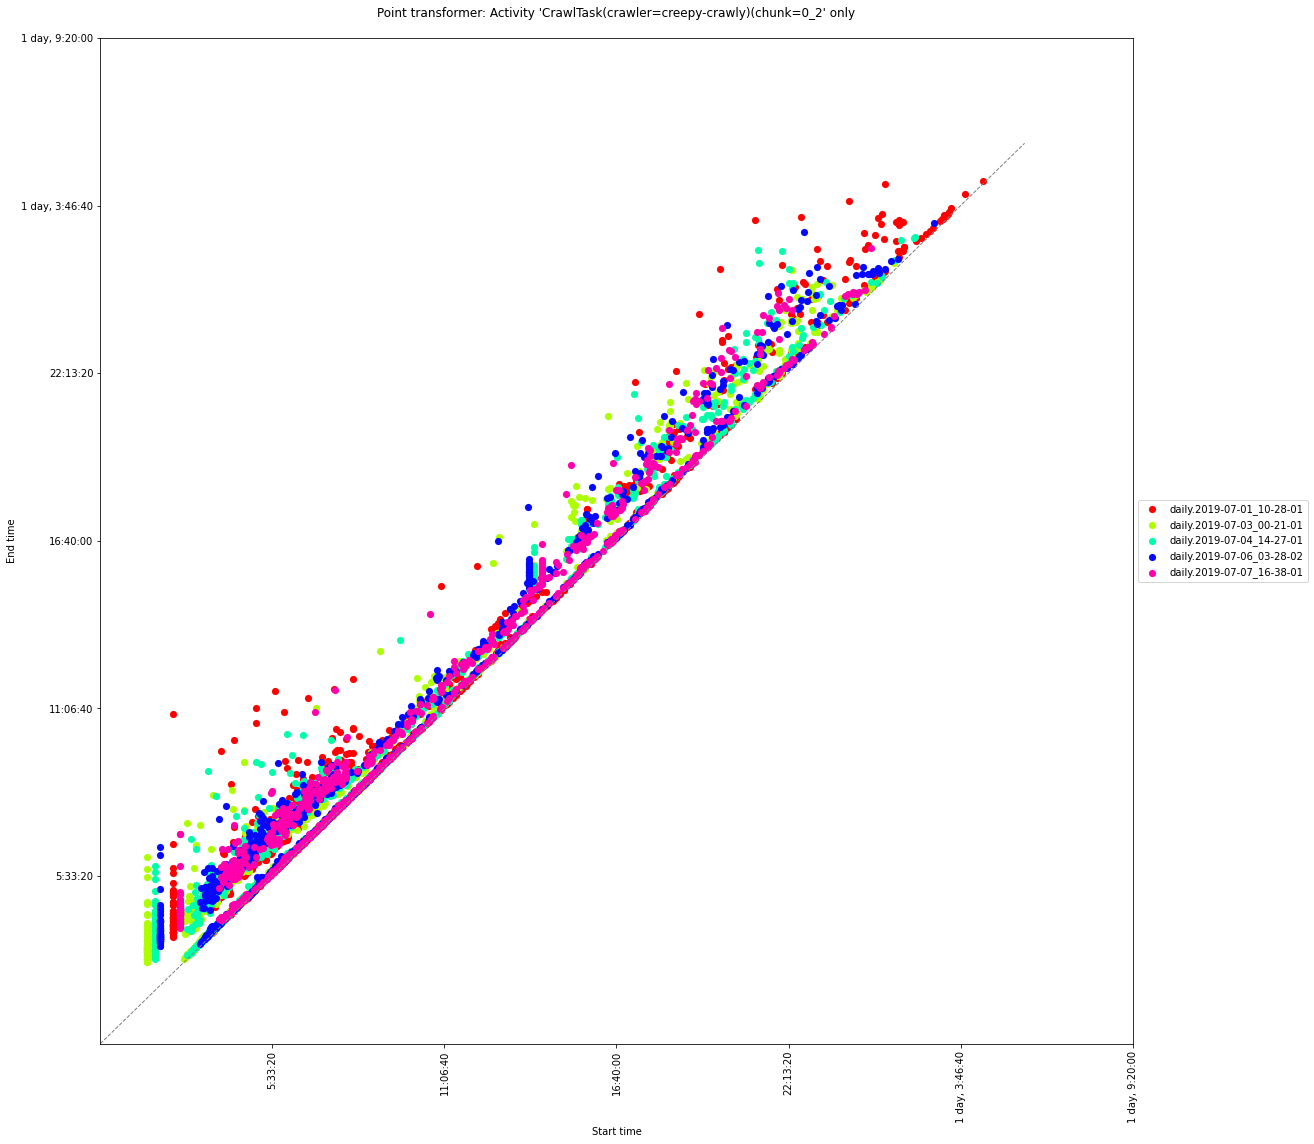

In [31]:
vis.plot_activities(sample[sample['activity']=='CrawlTask(crawler=creepy-crawly)(chunk=0_2'], show_plot=1)

## Compute average trace
Average skyline contains a point per activity, depicting the average start and average end timestamps of it.

In [32]:
average_trace_activities = get_average_trace(get_relative_timestamps(excluding)).sort_values(by=['num_start'])
print('Average trace over activities has',len(average_trace_activities),'events')
average_trace_activities.head()
#print('AllTasks' in average_trace_activities)

Grouped: 6265 columns ['case', 'activity', 'rel_start', 'rel_end', 'num_start', 'num_end', 'start_time', 'end_time', 'zero_point']
Merged relatived: 6745 columns ['case', 'activity', 'rel_start_x', 'rel_end_x', 'num_start_x', 'num_end_x', 'start_time', 'end_time', 'zero_point', 'rel_start_y', 'rel_end_y', 'num_start_y', 'num_end_y']
Average trace over activities has 70 events


,activity,average_start,average_end,num_start,num_end,case,std_num_end
1,CrawlFeedTask_61,00:00:00,00:18:03,0.0,1083.6,Average Case,0.000000e+00
3,DumpTask(sql_filename=reprocess_urls)(kvs=None...,00:00:12,00:00:55,12.2,55.2,Average Case,0.000000e+00
0,DumpTask(sql_filename=_11,00:00:12,00:11:14,12.4,674.2,Average Case,1.176771e-13
5,DumpTask(sql_filename=mgmt_response)(kvs=None)...,00:01:50,01:27:38,110.4,5258.2,Average Case,0.000000e+00
2,ProxySetupTask_16,00:06:25,00:13:00,385.4,780.3,Average Case,0.000000e+00


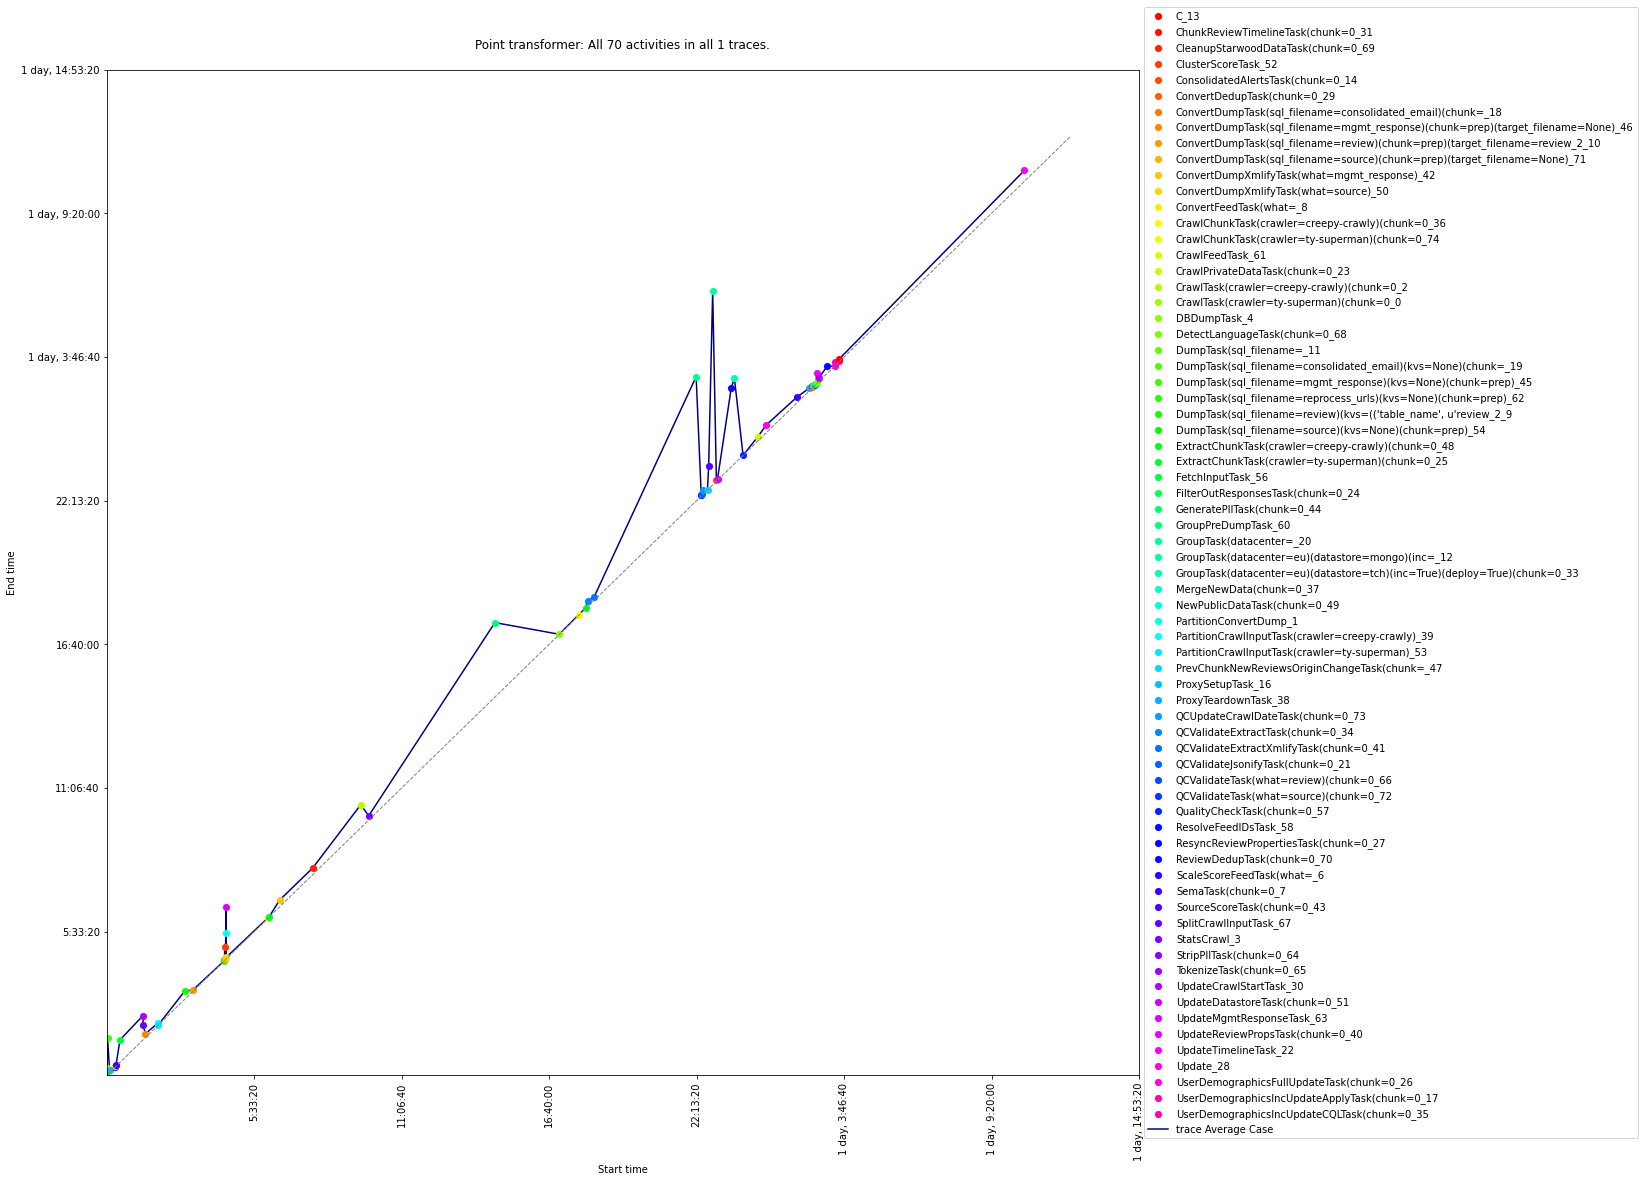

In [33]:
vis.plot_traces(average_trace_activities, show_plot=None)

In case only one subset of activities from the whole data set should be investigated

NOTE: This is specific to the 'daily.2019-0.csv' dataset

In [34]:
subset = excluding.copy() #Comment this out to only examine a certain snippet of the subset from above
subset.head()

,case,activity,rel_start,rel_end,num_start,num_end,start_time,end_time
0,daily.2019-07-01_10-28-01,DumpTask(sql_filename=_11,0:00:00,0:04:52,0.0,292.0,2019-07-01 10:41:26,2019-07-01 10:46:18
21,daily.2019-07-01_10-28-01,CrawlFeedTask_61,0:00:00,0:17:10,0.0,1030.0,2019-07-01 10:41:26,2019-07-01 10:58:36
22,daily.2019-07-01_10-28-01,ProxySetupTask_16,0:00:00,0:13:17,0.0,797.0,2019-07-01 10:41:26,2019-07-01 10:54:43
23,daily.2019-07-01_10-28-01,DumpTask(sql_filename=_11,0:00:00,1:02:58,0.0,3778.0,2019-07-01 10:41:26,2019-07-01 11:44:24
24,daily.2019-07-01_10-28-01,DumpTask(sql_filename=reprocess_urls)(kvs=None...,0:00:00,0:01:43,0.0,103.0,2019-07-01 10:41:26,2019-07-01 10:43:09


## Compute Performance Skylines

In [35]:
skyline_points = get_skyline_points(subset)
representative = skyline_points[['case','activity']].drop_duplicates()

print(len(subset),' points in total distributed among', len(subset['case'].unique()), 'cases\n\nInfo about the skyline:')
print('- ',len(skyline_points),'/',len(subset),'=', round(len(skyline_points)/len(subset)*100,2), '% events are part of a skyline')
print('- ',len(skyline_points['activity'].unique()),'/',len(subset['activity'].unique()),'=', round(len(skyline_points['activity'].unique())/len(subset['activity'].unique())*100,2), 'activities are part of a skyline.')
print('- ',len(representative),'/',len(skyline_points),'=', round(len(representative)/len(skyline_points)*100,2), '% unique activities on the skylines.') 
print("   'Unique' meaning there are no two points with the same 'activity' on the skyline of the same trace. ")

skyline_points.head()

6265  points in total distributed among 5 cases

Info about the skyline:
-  229 / 6265 = 3.66 % events are part of a skyline
-  25 / 70 = 35.71 activities are part of a skyline.
-  82 / 229 = 35.81 % unique activities on the skylines.
   'Unique' meaning there are no two points with the same 'activity' on the skyline of the same trace. 


,num_start,num_end,activity,case
0,0.0,292.0,DumpTask(sql_filename=_11,daily.2019-07-01_10-28-01
1,0.0,1030.0,CrawlFeedTask_61,daily.2019-07-01_10-28-01
2,0.0,1030.0,ProxySetupTask_16,daily.2019-07-01_10-28-01
3,0.0,3778.0,DumpTask(sql_filename=_11,daily.2019-07-01_10-28-01
4,0.0,3778.0,DumpTask(sql_filename=reprocess_urls)(kvs=None...,daily.2019-07-01_10-28-01


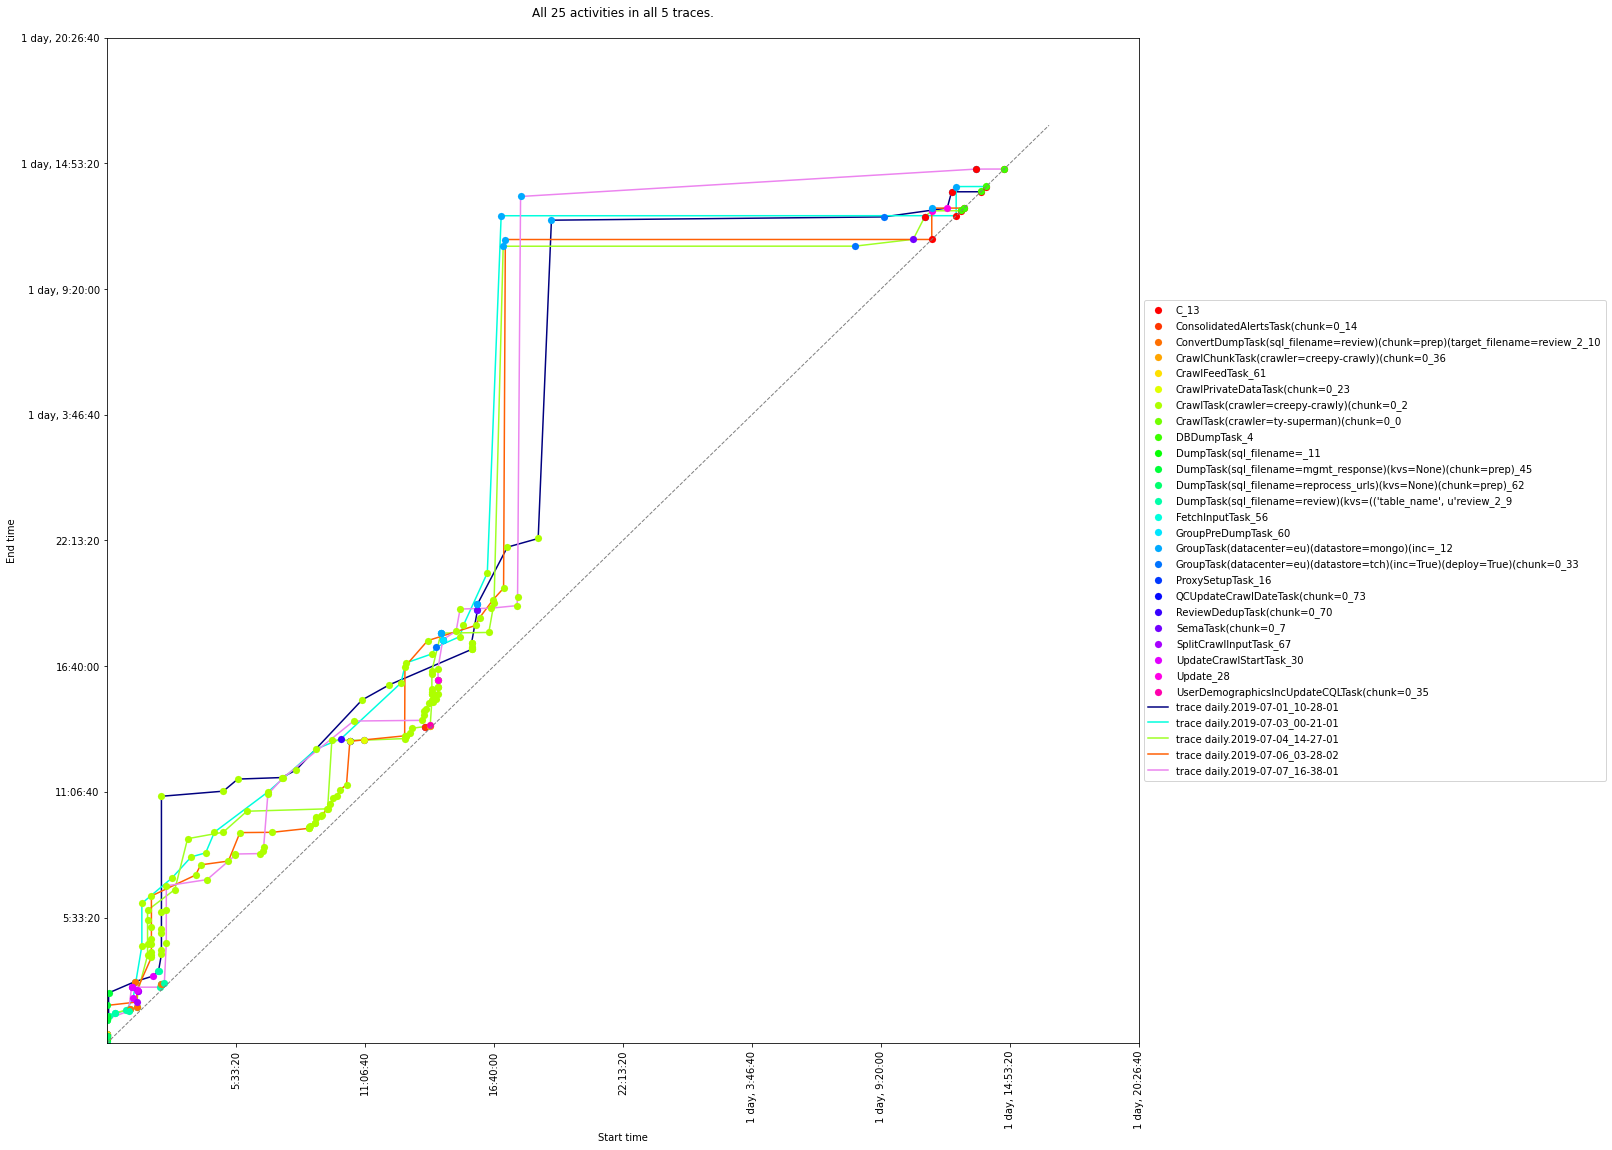

In [46]:
vis.plot_traces(skyline_points)

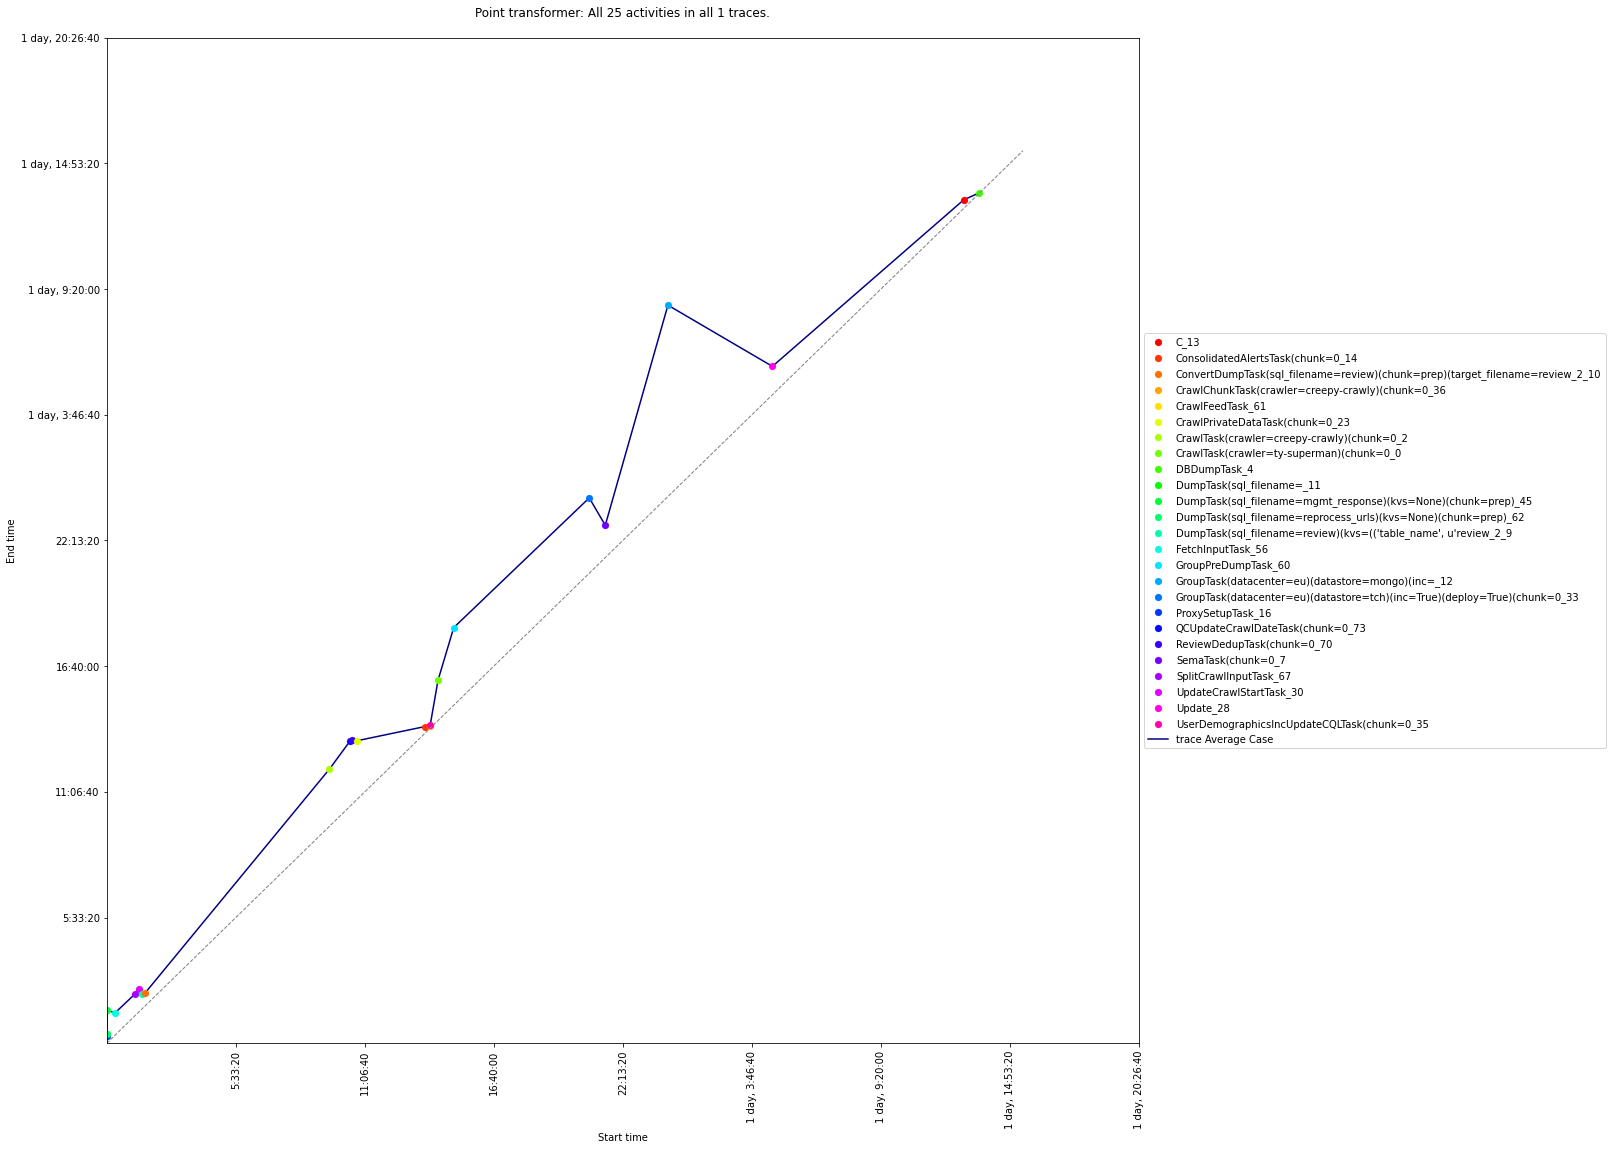

In [39]:
skyline_average = get_skyline_average(subset)
vis.plot_traces(skyline_average)

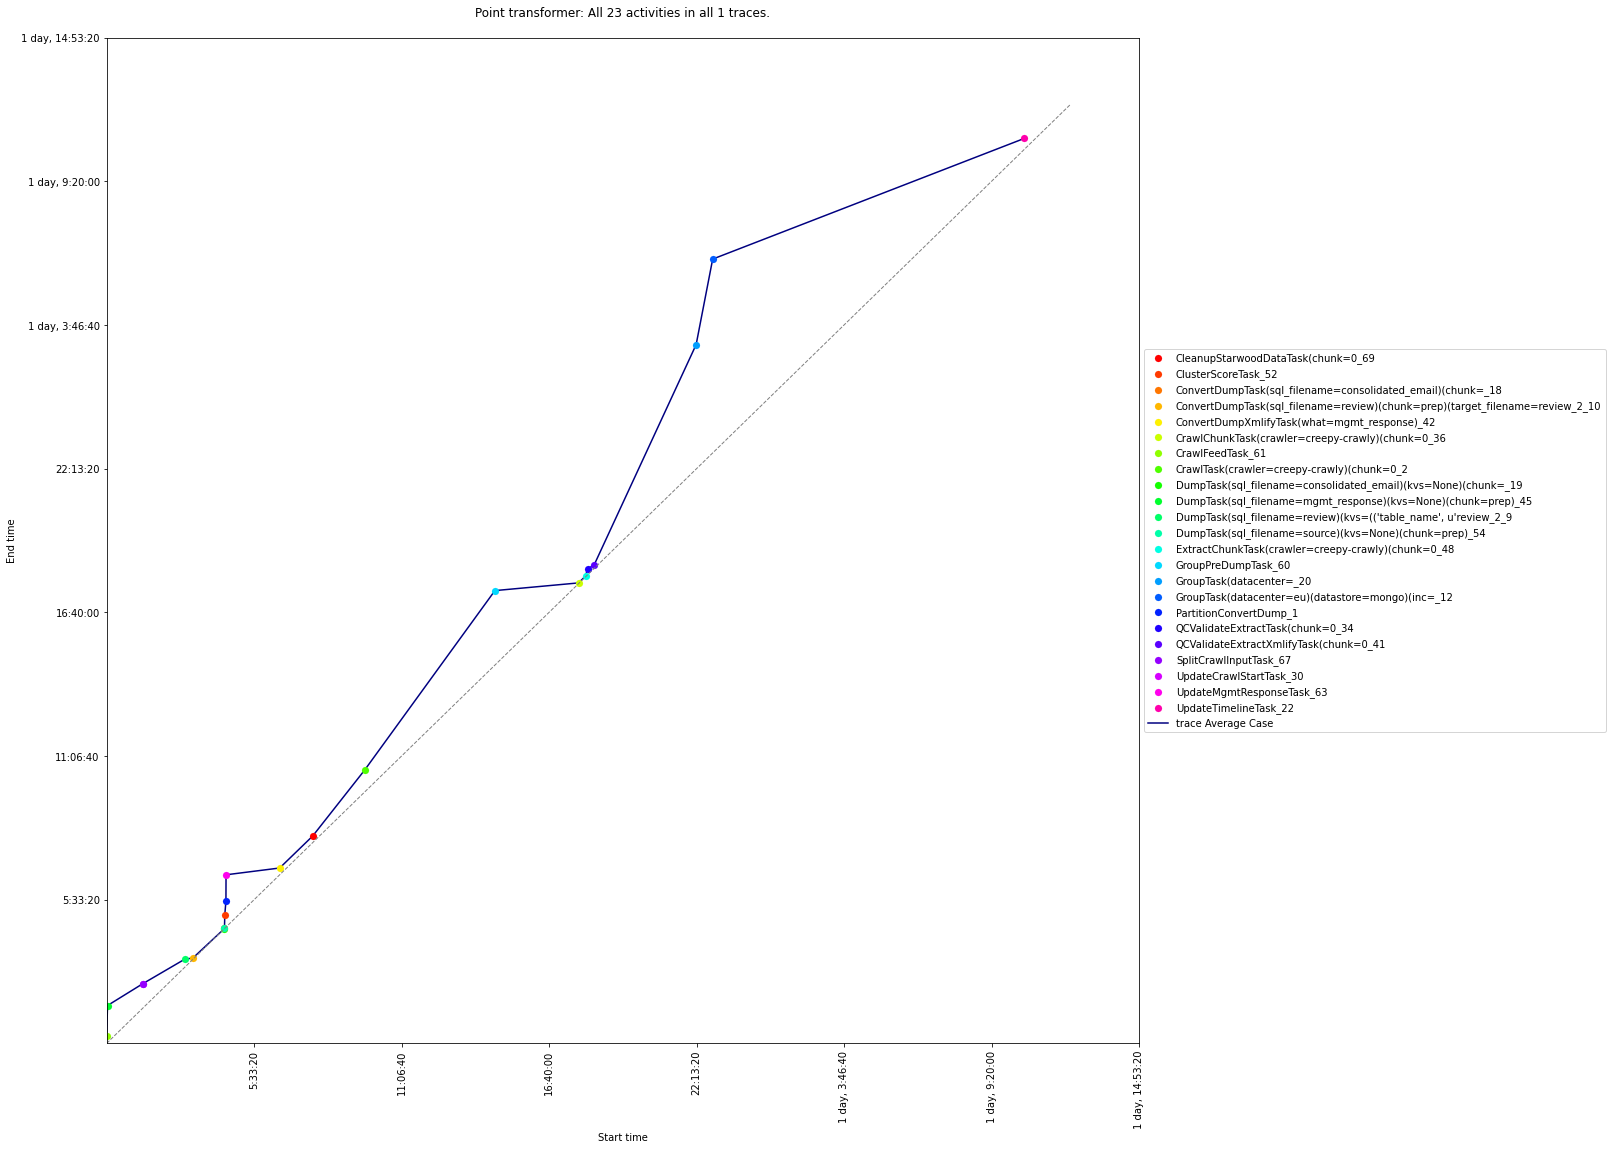

In [40]:
average_skyline = get_average_skyline(subset)
vis.plot_traces(average_skyline)

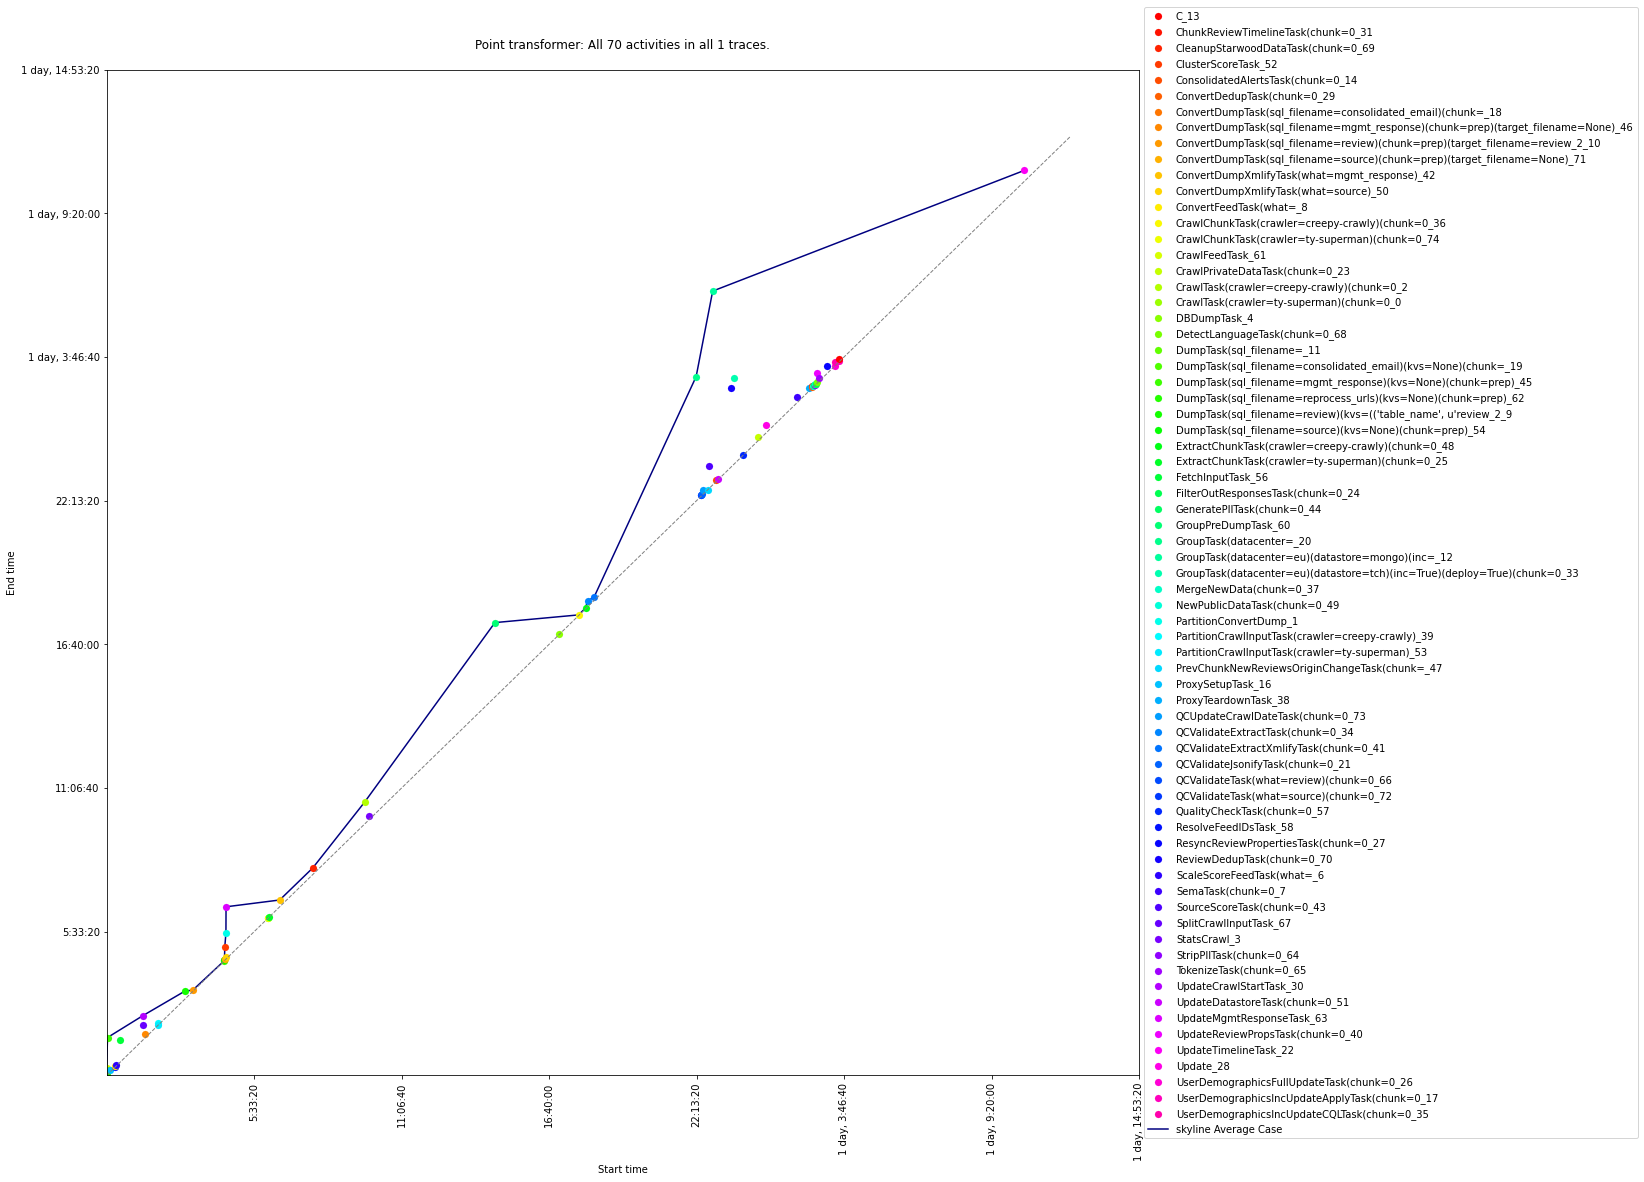

In [41]:
average_trace = get_average_trace(subset)
vis.plot_traces(average_trace, draw_skylines=1)

## Skyline Activity Set

In [51]:
#skyline_actset = get_skyline_activity_set(subset)
#skyline_actset

## Stats by Case

In [36]:
all_by_case = subset.groupby('case').size().reset_index(name='total_points_in_case').sort_values(by=['total_points_in_case'], ascending=False)
skyline_by_case = skyline_points.groupby('case').size().reset_index(name='skyline_points_in_case').sort_values(by=['skyline_points_in_case'], ascending=False)
r_by_case = representative.groupby('case').size().reset_index(name='unique_skyline_activities_in_case').sort_values(by=['unique_skyline_activities_in_case'], ascending=False)
by_case = r_by_case.merge(skyline_by_case, on='case', how='inner')
#all_by_case.plot.hist(bins=8, alpha=0.5)

all_by_activity = subset.groupby('activity').size().reset_index(name='total_points_per_activity').sort_values(by=['total_points_per_activity'], ascending=False)
all_by_activity['total_points_per_activity']=all_by_activity.apply(lambda row: round(row['total_points_per_activity']/50), axis=1)

In [38]:
merged_by_case = by_case.merge(all_by_case)[['case','total_points_in_case','skyline_points_in_case', 'unique_skyline_activities_in_case']].sort_values(by=['total_points_in_case'], ascending=False)
merged_by_case['skyline_percentage'] = merged_by_case.apply(lambda row: round(row['skyline_points_in_case']/row['total_points_in_case']*100,2), axis=1)
merged_by_case['unique_percentage'] = merged_by_case.apply(lambda row: round(row['unique_skyline_activities_in_case']/row['skyline_points_in_case']*100,2), axis=1)
print('Expectation/Averages: \ntotal_points_in_case:\t\t\t',round(merged_by_case['total_points_in_case'].mean(),2))
print('skyline_points_in_case:\t\t\t',round(merged_by_case['skyline_points_in_case'].mean(),2))
print('unique_skyline_activities_in_case:\t',round(merged_by_case['unique_skyline_activities_in_case'].mean(),2))
print('skyline_percentage:\t\t\t',round(merged_by_case['skyline_percentage'].mean(),2))
print('unique_percentage:\t\t\t',round(merged_by_case['unique_percentage'].mean(),2))
merged_by_case.head()

Expectation/Averages: 
total_points_in_case:			 1253.0
skyline_points_in_case:			 45.8
unique_skyline_activities_in_case:	 16.4
skyline_percentage:			 3.65
unique_percentage:			 36.49


,case,total_points_in_case,skyline_points_in_case,unique_skyline_activities_in_case,skyline_percentage,unique_percentage
1,daily.2019-07-07_16-38-01,1261,53,17,4.20,32.08
4,daily.2019-07-06_03-28-02,1261,49,13,3.89,26.53
0,daily.2019-07-04_14-27-01,1248,55,23,4.41,41.82
3,daily.2019-07-03_00-21-01,1248,29,13,2.32,44.83
2,daily.2019-07-01_10-28-01,1247,43,16,3.45,37.21


## Compute duration plot

In [42]:
CASE_ID_COL = "case"
ACTIVITY_ID_COL = "activity"

w_duration = subset.copy()
w_duration['duration'] = w_duration.apply(lambda row: str(get_duration(str(row['start_time']),str(row['end_time']))), axis=1)#, show_plot=show_plot)
w_duration['rel_end']=w_duration['duration']
w_duration['t_duration']= w_duration.apply(lambda row: (get_duration(str(row['start_time']),str(row['end_time'])).total_seconds()), axis=1)#, show_plot=show_plot)
w_duration['num_end']=w_duration['t_duration']
w_duration = w_duration[[CASE_ID_COL,ACTIVITY_ID_COL,'rel_start','num_start', 'rel_end', 'num_end']]

w_duration.head()

,case,activity,rel_start,num_start,rel_end,num_end
0,daily.2019-07-01_10-28-01,DumpTask(sql_filename=_11,0:00:00,0.0,0:04:52,292.0
21,daily.2019-07-01_10-28-01,CrawlFeedTask_61,0:00:00,0.0,0:17:10,1030.0
22,daily.2019-07-01_10-28-01,ProxySetupTask_16,0:00:00,0.0,0:13:17,797.0
23,daily.2019-07-01_10-28-01,DumpTask(sql_filename=_11,0:00:00,0.0,1:02:58,3778.0
24,daily.2019-07-01_10-28-01,DumpTask(sql_filename=reprocess_urls)(kvs=None...,0:00:00,0.0,0:01:43,103.0


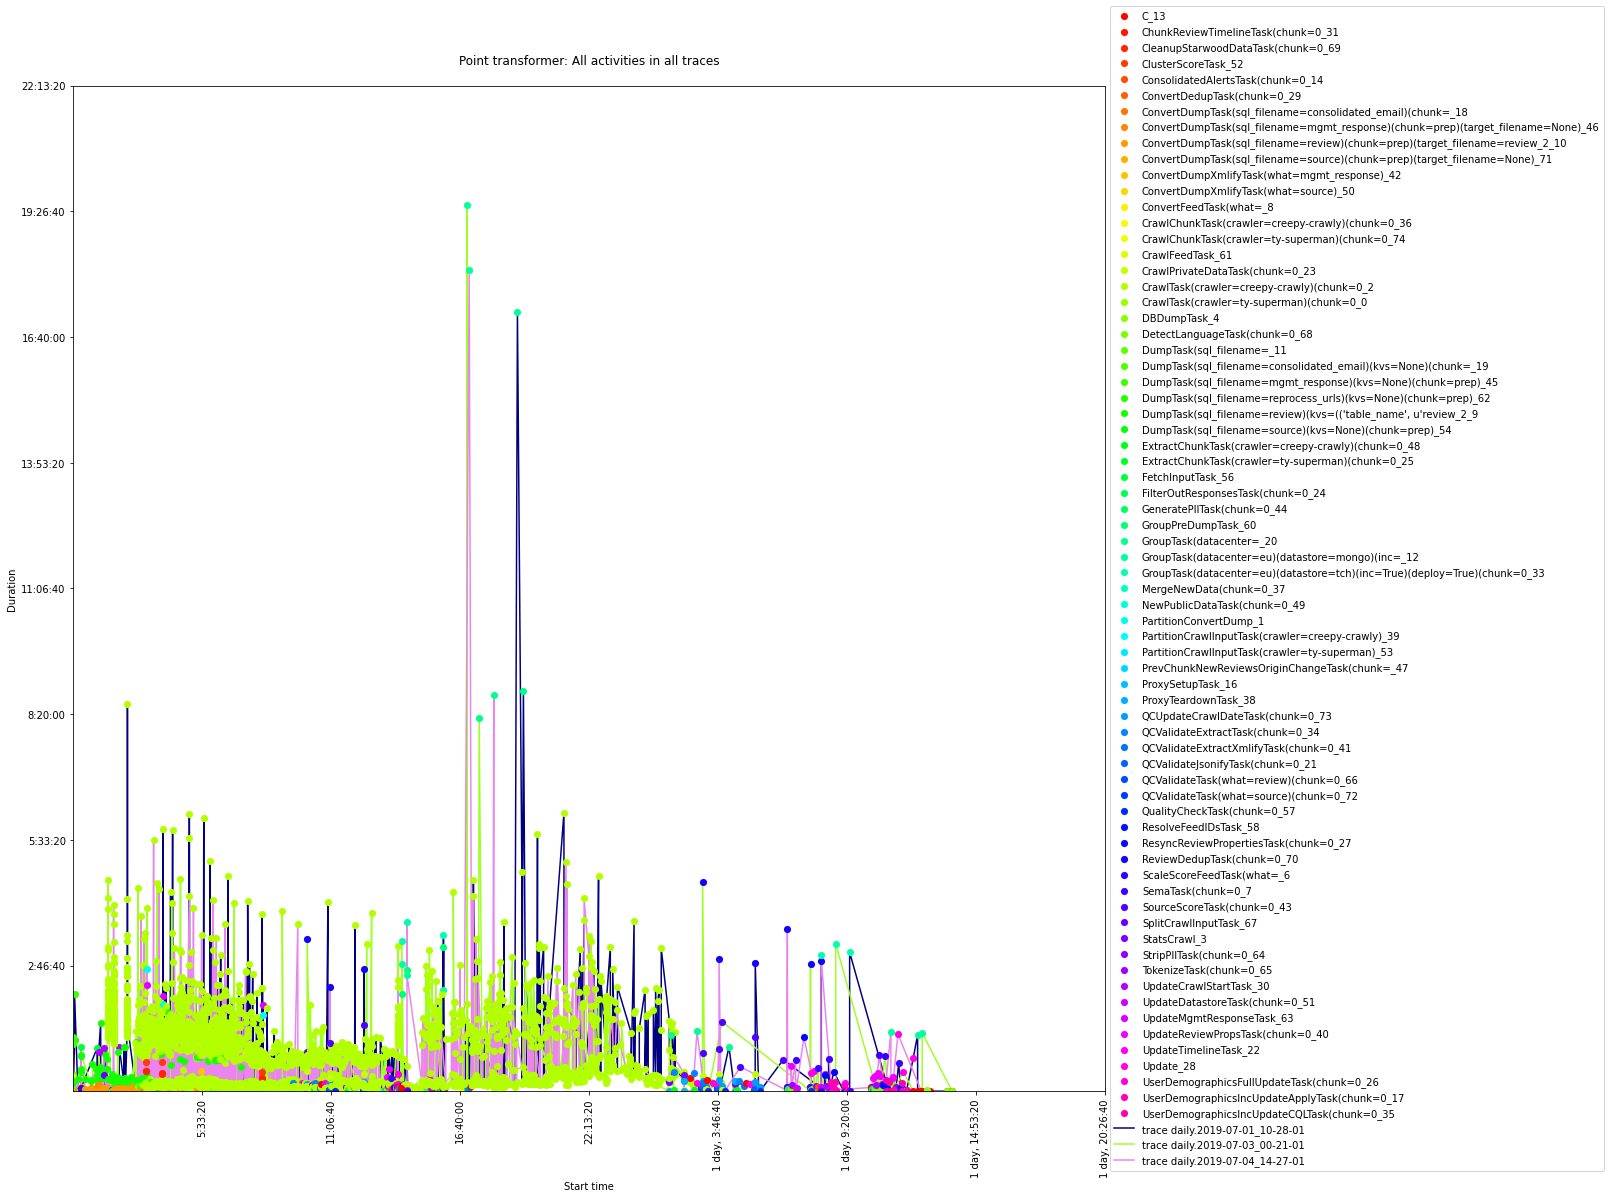

In [43]:
LEN_SUBSET=3
first_n_duration = w_duration[w_duration[CASE_ID_COL].isin(w_duration[CASE_ID_COL].drop_duplicates().tolist()[0:LEN_SUBSET])]
first_n_duration
vis.plot_duration_traces(first_n_duration, show_plot=1)

## Everything at once

In [ ]:
vis.run_plots(subset, "../output/example", show_plot=1)


Subset of  ['DumpTask', 'CrawlFeedTask_61', 'ProxySetupTask_16', 'ResolveFeedIDsTask_58', 'ConvertFeedTask', 'ScaleScoreFeedTask', 'FetchInputTask_56', 'ConvertDumpTask', 'SplitCrawlInputTask_67', 'UpdateCrawlStartTask_30', 'PartitionCrawlInputTask', 'StatsCrawl_3', 'CrawlTask', 'CrawlChunkTask', 'ExtractChunkTask', 'ClusterScoreTask_52', 'CleanupStarwoodDataTask', 'PartitionConvertDump_1', 'UpdateMgmtResponseTask_63', 'ConvertDumpXmlifyTask', 'DBDumpTask_4', 'QCValidateExtractTask', 'QCValidateExtractXmlifyTask', 'C_13', 'Update_28', 'QCValidateTask', 'SourceScoreTask', 'QCValidateJsonifyTask', 'CrawlPrivateDataTask', 'ReviewDedupTask', 'QCUpdateCrawlDateTask', 'QualityCheckTask', 'PrevChunkNewReviewsOriginChangeTask', 'SemaTask', 'ChunkReviewTimelineTask', 'ConvertDedupTask', 'NewPublicDataTask', 'GeneratePIITask', 'StripPIITask', 'MergeNewData', 'FilterOutResponsesTask', 'DetectLanguageTask', 'UpdateReviewPropsTask', 'TokenizeTask', 'ConsolidatedAlertsTask', 'UpdateDatastoreTask', 